In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sehwag = pd.read_csv('sehwag.csv')
dravid = pd.read_csv('dravid.csv')

In [3]:
sehwag.shape

(245, 14)

In [4]:
dravid.shape

(318, 14)

In [5]:
sehwag

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
0,1,5,2,0,0,50.00,7,lbw,1,NaN,v Pakistan,Mohali,1 Apr 1999,ODI # 1427
1,19,18,24,0,1,79.16,6,caught,1,NaN,v Zimbabwe,Rajkot,14 Dec 2000,ODI # 1660
2,58,62,54,8,0,107.40,6,bowled,1,NaN,v Australia,Bengaluru,25 Mar 2001,ODI # 1696
3,2,7,7,0,0,28.57,6,caught,2,NaN,v Zimbabwe,Bulawayo,27 Jun 2001,ODI # 1730
4,11,19,16,1,0,68.75,6,not out,2,NaN,v West Indies,Bulawayo,30 Jun 2001,ODI # 1731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,15,21,15,2,0,100.00,2,caught,1,NaN,v Sri Lanka,Hambantota,24 Jul 2012,ODI # 3292
241,3,6,6,0,0,50.00,2,caught,2,NaN,v Sri Lanka,Colombo (RPS),28 Jul 2012,ODI # 3293
242,34,46,29,6,0,117.24,2,caught,2,NaN,v Sri Lanka,Colombo (RPS),31 Jul 2012,ODI # 3294
243,4,20,11,1,0,36.36,2,bowled,1,NaN,v Pakistan,Chennai,30 Dec 2012,ODI # 3314


In [6]:
p_25 = np.percentile(sehwag['Runs'],25)
p_25

8.0

In [7]:
p_50 = np.percentile(sehwag['Runs'],50)
p_50

23.0

In [8]:
p_75 = np.percentile(sehwag['Runs'],75)
p_75

46.0

In [9]:
iqr = p_75-p_25
iqr

38.0

In [10]:
sehwag['Runs'].quantile(.25)

8.0

In [11]:
sehwag['Runs'].quantile(.5)

23.0

In [12]:
sehwag['Runs'].quantile(.75)

46.0

In [13]:
lower = max(p_25-(1.5*iqr),0)
lower

0

In [14]:
upper = min(p_75+(1.5*iqr),sehwag['Runs'].max())
upper

103.0

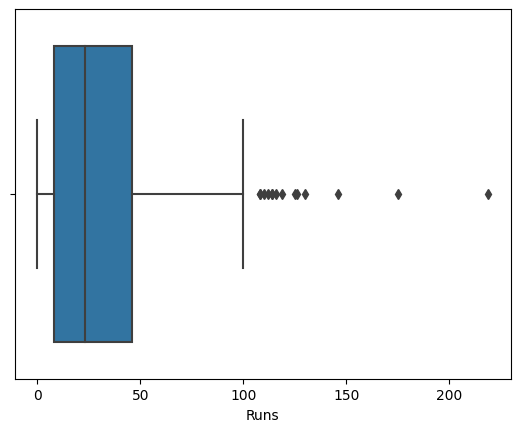

In [15]:
sns.boxplot(x=sehwag['Runs'])
plt.show()

In [16]:
sehwags_outlier = sehwag[sehwag['Runs']>upper]
sehwags_outlier.shape

(14, 14)

In [17]:
sehwag.shape

(245, 14)

In [18]:
14/245*100

5.714285714285714

In [19]:
dravid['Runs'].describe()

count    318.000000
mean      34.242138
std       29.681822
min        0.000000
25%       10.000000
50%       26.000000
75%       54.000000
max      153.000000
Name: Runs, dtype: float64

In [20]:
d_25 = dravid['Runs'].quantile(.25)
d_50 = dravid['Runs'].quantile(.5)
d_75 = dravid['Runs'].quantile(.75)
print(d_25,d_50,d_75)

10.0 26.0 54.0


In [21]:
lower_d = max(d_25-(1.5*iqr),dravid['Runs'].min())
upper_d = min(d_75+(1.5*iqr),dravid['Runs'].max())

iqr_d = upper_d - lower_d
iqr_d

111.0

In [22]:
dravid_outlier = dravid[dravid['Runs']>upper_d]
dravid_outlier['Runs'].shape

(4,)

In [23]:
dravid.shape

(318, 14)

In [24]:
4/318*100

1.257861635220126

In [25]:
df_hw = pd.read_csv('weight-height.csv')
df_hw

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


C:\Users\Rhythm Shah\AppData\Local\Temp\ipykernel_17488\4109433770.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_hw["Height"])


<AxesSubplot: xlabel='Height', ylabel='Density'>

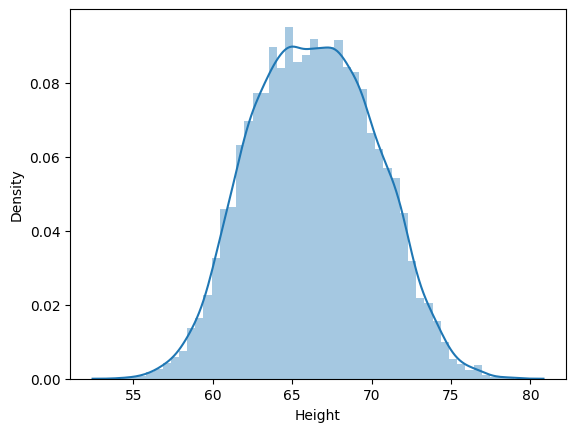

In [26]:
sns.distplot(df_hw["Height"])

<AxesSubplot: xlabel='Height', ylabel='Density'>

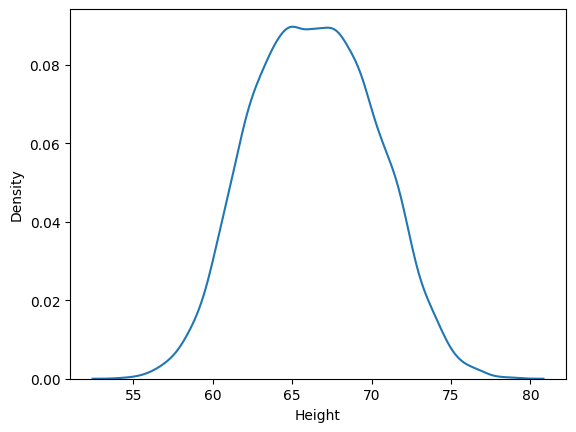

In [27]:
sns.kdeplot(df_hw['Height'])

In [28]:
from statsmodels.distributions.empirical_distribution import ECDF

In [29]:
e = ECDF(df_hw['Height'])

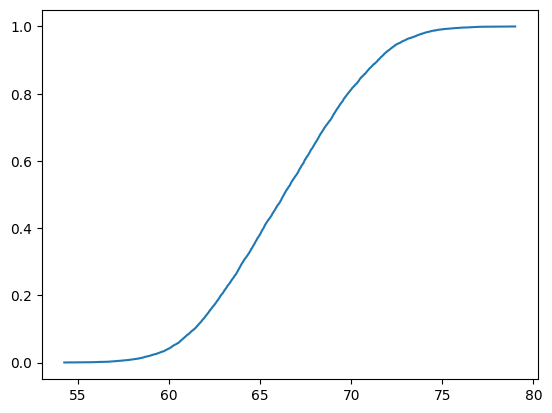

In [30]:
plt.plot(e.x,e.y)

In [31]:
min_height = df_hw['Height'].min()
max_height = df_hw['Height'].max()
min_height

54.2631333250971

In [32]:
x_values = np.linspace(min_height,max_height,1000)

In [33]:
df_height = df_hw['Height']
y_values = []

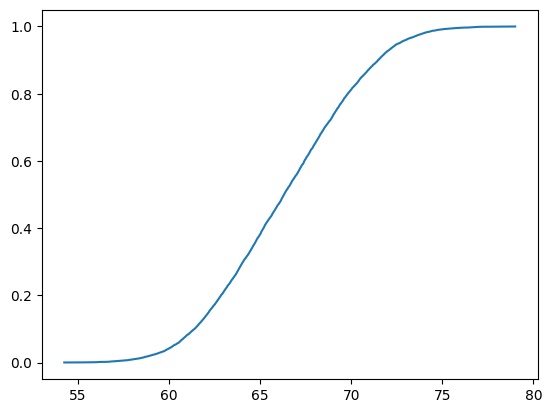

In [34]:
for x in x_values:
    people_shorter_than_x = df_height[df_height<=x]
    num_people_shorter_than_x = len(people_shorter_than_x)
    frac_people_shorter_than_x = num_people_shorter_than_x/df_height.shape[0]
    y_values.append(frac_people_shorter_than_x)
plt.plot(x_values, y_values)